# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 2 - ODE in 3D

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

## Projectile in 2D without air resistance

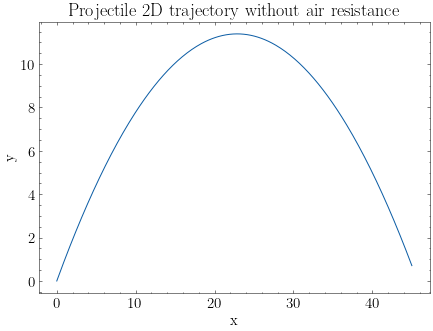

In [111]:
dt = 0.01
t = np.arange(0, 3.0 + dt, dt)
N = len(t)

r = np.zeros((2, N))
v = np.zeros((2, N))

rx0 = 0.0
ry0 = 0.0
vx0 = 15.0
vy0 = 15.0

r[0,0] = rx0
r[1,0] = ry0
v[0,0] = vx0
v[1,0] = vy0

def f_freefall(ri, vi, ti):
    rxi, ryi = ri
    vxi, vyi = vi
    g = 9.81
    m = 1.0
    
    fx = rxi*0 + vxi*0 + ti*0
    fy = -g/m + ryi*0 + vyi*0 + ti*0
    
    return [fx, fy]


def solver_ode(f, r, v, t, dt):
    N = len(t)
    for i in range(N-1):
        # Solving x
        v[0, i+1] = v[0, i] + f_freefall(r[:,i], v[:,i], t[i])[0]*dt
        v[1, i+1] = v[1, i] + f_freefall(r[:,i], v[:,i], t[i])[1]*dt
        # Solving y
        r[0, i+1] = r[0, i] + v[0, i + 1]*dt
        r[1, i+1] = r[1, i] + v[1, i+1]*dt

    return r, v

r, v = solver_ode(f_freefall, r, v, t, dt)

plt.plot(r[0,:], r[1,:])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Projectile 2D trajectory without air resistance')
plt.show()

## Projectile in 3D without air resistance

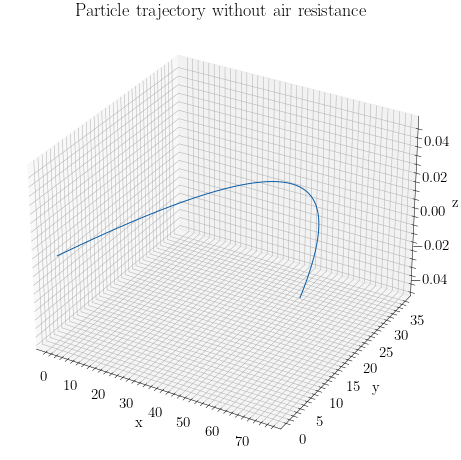

In [112]:
dt = 0.01
t = np.arange(0, 5.0 + dt, dt)
N = len(t)

r = np.zeros((3, N))
v = np.zeros((3, N))

rx0 = 0.0
ry0 = 0.0
rz0 = 0.0


v_initial = 30.0
theta = np.pi/3 
vx0 = v_initial*np.cos(theta)
vy0 = v_initial*np.sin(theta)
vz0 = 0.0

r[0,0] = rx0
r[1,0] = ry0
r[2,0] = rz0
v[0,0] = vx0
v[1,0] = vy0
v[2,0] = vz0

def f_freefall(ri, vi, ti):
    rxi, ryi, rzi = ri
    vxi, vyi, vzi = vi
    g = 9.81
    m = 1.0
    
    fx = rxi*0 + vxi*0 + ti*0
    fy = -g/m + ryi*0 + vyi*0 + ti*0
    fz = rzi*0 + vzi*0 + ti*0
    
    return [fx, fy, fz]


def solver_ode(f, r, v, t, dt):
    N = len(t)
    for i in range(N-1):
        # Solving velocities
        v[0, i+1] = v[0, i] + f_freefall(r[:,i], v[:,i], t[i])[0]*dt
        v[1, i+1] = v[1, i] + f_freefall(r[:,i], v[:,i], t[i])[1]*dt
        v[2, i+1] = v[2, i] + f_freefall(r[:,i], v[:,i], t[i])[2]*dt
        
        # Solving positions
        r[0, i+1] = r[0, i] + v[0, i+1]*dt
        r[1, i+1] = r[1, i] + v[1, i+1]*dt
        r[2, i+1] = r[2, i] + v[2, i+1]*dt
    return r, v

r, v = solver_ode(f_freefall, r, v, t, dt)


fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")
ax.plot3D(r[0,:], r[1,:], r[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Particle trajectory without air resistance')
plt.show()

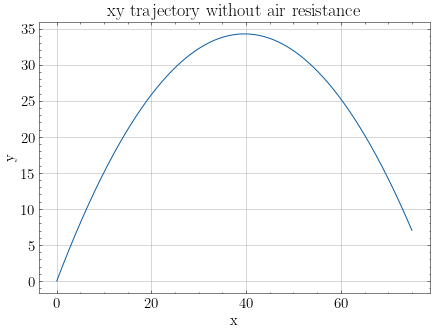

In [113]:
plt.plot(r[0,:], r[1,:])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('xy trajectory without air resistance')
plt.show()

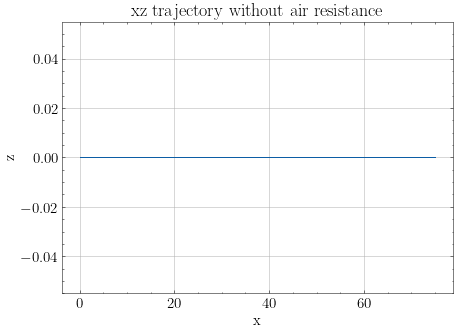

In [114]:
plt.plot(r[0,:], r[2,:])
plt.xlabel('x')
plt.ylabel('z')
plt.grid()
plt.title('xz trajectory without air resistance')
plt.show()

## Projectile in 3D with quadratic air resistance (Magnus effect)

In [115]:
dt = 0.01
t = np.arange(0, 1.0 + dt, dt)
N = len(t)

r = np.zeros((3, N))
v = np.zeros((3, N))
omega = np.zeros((3, N))

rx0 = 0.0
ry0 = 0.0
rz0 = 0.0

v_initial = 30.0
theta = np.pi/3
vx0 = v_initial*np.cos(theta)
vy0 = v_initial*np.sin(theta)
vz0 = 0.0

omega_x_0 = 2*np.pi*40 # 2400 rpm
omega_y_0 = 0.0
omega_z_0 = 0.0


r[0,0] = rx0
r[1,0] = ry0
r[2,0] = rz0
v[0,0] = vx0
v[1,0] = vy0
v[2,0] = vz0
omega[0,0] = omega_x_0
omega[1,0] = omega_y_0
omega[2,0] = omega_z_0


def f_magnus(ri, vi, omega_i, ti):
    rxi, ryi, rzi = ri
    vxi, vyi, vzi = vi
    omega_xi, omega_yi, omega_zi = omega_i
    v_norm_i = np.linalg.norm(vi)
    g = 9.81
    m = 0.15
    c_d = 6e-3
    c_m = 4e-4
    
    fx = -c_d*vxi*np.abs(v_norm_i) + c_m*(omega_yi*vzi - omega_zi*vyi)
    fy = -g/m - c_d*vyi*np.abs(v_norm_i) + c_m*(omega_zi*vxi - omega_xi*vzi)
    fz = -c_d*vzi*np.abs(v_norm_i) + c_m*(omega_xi*vyi - omega_yi*vxi)
    
    return [fx, fy, fz]


def solver_ode(f, r, v, t, dt):
    N = len(t)
    for i in range(N-1):
        # Solving velocities
        v[0, i+1] = v[0, i] + f(r[:,i], v[:,i], omega[:,i], t[i])[0]*dt
        v[1, i+1] = v[1, i] + f(r[:,i], v[:,i], omega[:,i], t[i])[1]*dt
        v[2, i+1] = v[2, i] + f(r[:,i], v[:,i], omega[:,i], t[i])[2]*dt
        
        # Solving positions
        r[0, i+1] = r[0, i] + v[0, i+1]*dt
        r[1, i+1] = r[1, i] + v[1, i+1]*dt
        r[2, i+1] = r[2, i] + v[2, i+1]*dt
    return r, v

r, v = solver_ode(f_magnus, r, v, t, dt)

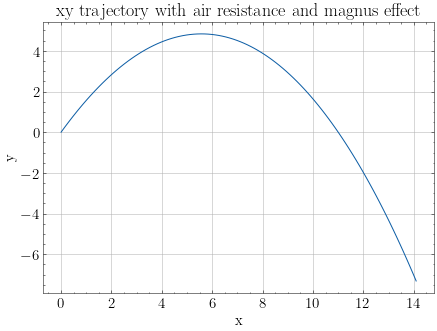

In [116]:
plt.plot(r[0, :], r[1, :])
plt.xlabel('x')
plt.ylabel('y')
plt.title('xy trajectory with air resistance and magnus effect')
plt.grid()
plt.show()

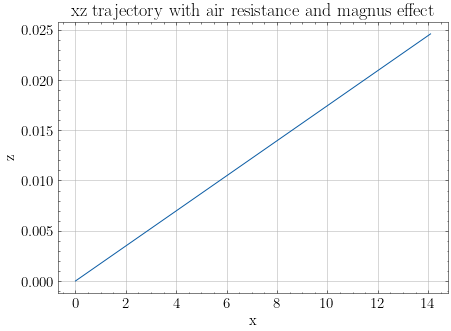

In [117]:
plt.plot(r[0, :], r[2, :])
plt.xlabel('x')
plt.ylabel('z')
plt.title('xz trajectory with air resistance and magnus effect')
plt.grid()
plt.show()

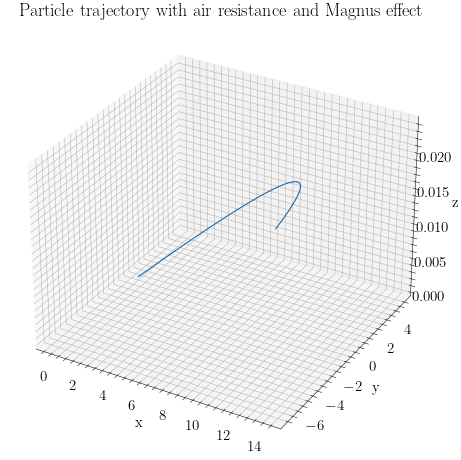

In [118]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")
ax.plot3D(r[0,:], r[1,:], r[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Particle trajectory with air resistance and Magnus effect')
plt.show()

## Charged particle in EM field

In [123]:
dt = 0.01
t = np.arange(0, 1.0 + dt, dt)
N = len(t)

r = np.zeros((3, N))
v = np.zeros((3, N))

rx0 = 0.0
ry0 = 0.0
rz0 = 0.0

vx0 = 0.0
vy0 = 0.0
vz0 = 0.0

r[0,0] = rx0
r[1,0] = ry0
r[2,0] = rz0

v[0,0] = vx0
v[1,0] = vy0
v[2,0] = vz0



def E_field(r, t):
    Ex = 0.0
    Ey = 10.0
    Ez = 0.0
    return [Ex, Ey, Ez]

def B_field():
    return

def f_lorentz(ri, vi, E, ti):
    rxi, ryi, rzi = ri
    vxi, vyi, vzi = vi
    q_m = 1.0/1.0
    
    fx = q_m*E[0, ti]
    fy = q_m*E[1, ti]
    fz = q_m*E[2, ti]
    
    return [fx, fy, fz]


def solver_ode(f, r, v, t, dt):
    N = len(t)
    for i in range(N-1):
        # Solving velocities
        v[0, i+1] = v[0, i] + f(r[:,i], v[:,i], E_field(r[:, i], t[i]), t[i])[0]*dt
        v[1, i+1] = v[1, i] + f(r[:,i], v[:,i], E_field(r[:, i], t[i]), t[i])[1]*dt
        v[2, i+1] = v[2, i] + f(r[:,i], v[:,i], E_field(r[:, i], t[i]), t[i])[2]*dt
        
        # Solving positions
        r[0, i+1] = r[0, i] + v[0, i+1]*dt
        r[1, i+1] = r[1, i] + v[1, i+1]*dt
        r[2, i+1] = r[2, i] + v[2, i+1]*dt
    return r, v

r, v = solver_ode(f_lorentz, r, v, t, dt)

TypeError: list indices must be integers or slices, not tuple